# import Data 

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("data/train.csv",sep = ",")
#train.head()



# indexer le dataframe avec la variable  PassengerId

In [2]:
train.set_index("PassengerId", inplace=True, drop = True)
#train

# analyse the columns and see what it means each of one them 


In [ ]:
train.columns

# the type of every variable 


In [ ]:
train.dtypes

# count the number of row that are not null for each variable :

In [ ]:
train.count()/891

# modelisation  quick and dirty 

In [ ]:
def parse_model(X):
    target = X.Survived
    X = X[["Fare","SibSp","Parch"]]
    return X,target

In [ ]:
#x,y = parse_model(train)

# Split our dataset 

In [3]:
from sklearn.model_selection  import cross_val_score

In [4]:

def compute_score(clf,X,Y):
    xval = cross_val_score(clf,X,Y, cv = 5)
    return np.mean(xval)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression()


In [7]:
#compute_score(lr,x,y)

# detect the important features with p value or chi2 test for indepent value 
# in our case we will use another methode 

In [10]:
""" 
let split out data set to two population the surviver and the not
"""
import matplotlib.pyplot as plt
survived = train[train.Survived==1]
dead = train[train.Survived == 0]

# observons la distrubution comparer des variable de ces deux population 
def plot_hist(feature,bins = 20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","Survived"],bins= bins)
    plt.legend(loc = "upper left")
    plt.title(" distrubution relative de %s "%feature)
    plt.show()

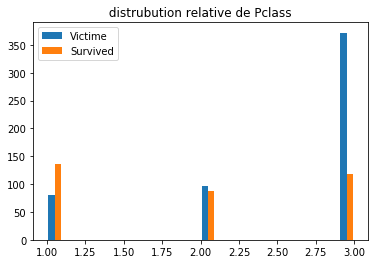

"\n - on deduit que la mojorite des victimes provient de la 3 em classe \n - a contraio les survivant provient de la premiere class \n - les passagers de la 2 em class seront plus compliques a classifier correctement car cette class parait\n     visuellement moins discriminante\n     \n conclusion :\n     cette variable est categorial mais elle est important a notre modele pour bien predire la survie ou la mort \n     comme c'est une variable categorielle il faut la traiter avant de l'integrer ( la rendre une variable dummies)\n"

In [11]:
plot_hist("Pclass")

"""
 - on deduit que la mojorite des victimes provient de la 3 em classe 
 - a contraio les survivant provient de la premiere class 
 - les passagers de la 2 em class seront plus compliques a classifier correctement car cette class parait
     visuellement moins discriminante
     
 conclusion :
     cette variable est categorial mais elle est important a notre modele pour bien predire la survie ou la mort 
     comme c'est une variable categorielle il faut la traiter avant de l'integrer ( la rendre une variable dummies)
"""

In [ ]:
# create a dummies viriable for the categorieles Pcass 
dummies = pd.get_dummies(train["Pclass"],prefix = "split_dum")
#dummies

# injecter cette variable  Pclass a notre modele

In [ ]:
def parse_model_1(X):
    target = X.Survived
    class_dummies =  pd.get_dummies(X["Pclass"],prefix = "split_dum")
    #print(dummies)
    X = X.join(class_dummies)
    to_del = ["Name","Age","Cabin","Embarked","Survived","Ticket"]
    for col in to_del:
        del X[col]
    return X,target

In [ ]:
x1,y1 = parse_model_1(train)

In [ ]:
#del x1["Pclass"]
del x1["Sex"]

In [ ]:
x1

In [ ]:
compute_score(lr,x1,y1)

# le poid de chaque variable par rapport a la logistic regression 

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x1,y1)

# Les coef  des features pour expliquer le models 

In [ ]:
print(lr.coef_[0])
""" l'interpretation est tres simple un poid positif augmente la probalite 
un poid negatfif diminue la probabilite, quand un poid es tres proche de zero ctd est moins
discriminant par rapport a la cible a predire
"""

# regardant les autre variable les femmes et les enfant d'abord 

In [12]:
def parse_model_2(X):
    # create dummies variable for sex and Pclass
    target = X.Survived
    to_dummy = ["Pclass","Sex"]
    for dum in to_dummy:
        split_tmp = pd.get_dummies(X[dum],prefix=("Split_"+dum))
        for col in split_tmp:
            X[col] = split_tmp[col]
        del X[dum]
    # fill the missing value of age with the median 
    X["Age"] = X.Age.fillna(X.Age.median())
    to_del = ["Survived","Name","Cabin","Embarked","Ticket"]
    for col in to_del:
        del X[col]
    return X,target

In [13]:
x2,y2 = parse_model_2(train)

In [14]:
x2

,Age,SibSp,Parch,Fare,Split_Pclass_1,Split_Pclass_2,Split_Pclass_3,Split_Sex_female,Split_Sex_male
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1
2,38.0,1,0,71.2833,1,0,0,1,0
3,26.0,0,0,7.9250,0,0,1,1,0
4,35.0,1,0,53.1000,1,0,0,1,0
5,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1
888,19.0,0,0,30.0000,1,0,0,1,0
889,28.0,1,2,23.4500,0,0,1,1,0


In [15]:
compute_score(lr,x2,y2)

/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.7856317870817902

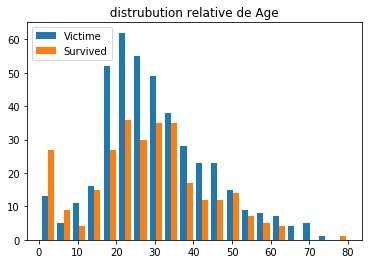

In [16]:
plot_hist("Age")
"""
 on remarque que les survivant sont bcq plus chew les enfants < 10 
 et les morts sont bcq plus chew les adult plus de 20
 
 cela signier que il faut creer une autre variable pour mieux faire parler Age 
 par example is_ a child 
 
 feature enginering 
 
"""

# feature engineering for Age 

In [17]:
x2["is_child"] = x2.Age < 8 

In [18]:
x2.is_child

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: is_child, Length: 891, dtype: bool

In [19]:
x2

,Age,SibSp,Parch,Fare,Split_Pclass_1,Split_Pclass_2,Split_Pclass_3,Split_Sex_female,Split_Sex_male,is_child
PassengerId,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,False
2,38.0,1,0,71.2833,1,0,0,1,0,False
3,26.0,0,0,7.9250,0,0,1,1,0,False
4,35.0,1,0,53.1000,1,0,0,1,0,False
5,35.0,0,0,8.0500,0,0,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,False
888,19.0,0,0,30.0000,1,0,0,1,0,False
889,28.0,1,2,23.4500,0,0,1,1,0,False


In [24]:
x2 = x2.join(pd.get_dummies(x2.is_child,prefix="split_is_child"))


ValueError: columns overlap but no suffix specified: Index(['split_is_child_False', 'split_is_child_True'], dtype='object')

In [27]:
del x2["is_child"]

In [28]:
x2

,Age,SibSp,Parch,Fare,Split_Pclass_1,Split_Pclass_2,Split_Pclass_3,Split_Sex_female,Split_Sex_male,split_is_child_False,split_is_child_True
PassengerId,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,1,0
2,38.0,1,0,71.2833,1,0,0,1,0,1,0
3,26.0,0,0,7.9250,0,0,1,1,0,1,0
4,35.0,1,0,53.1000,1,0,0,1,0,1,0
5,35.0,0,0,8.0500,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,1,0
888,19.0,0,0,30.0000,1,0,0,1,0,1,0
889,28.0,1,2,23.4500,0,0,1,1,0,1,0


In [29]:
compute_score(lr,x2,y2)

/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.8013307388111229

In [32]:
lr.fit(x2,y2)
lr.coef_

/home/ahmed/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-0.02118144, -0.44097548, -0.20705604,  0.00449727,  1.13858595,
         0.26617025, -0.74681718,  1.71918866, -1.06124964, -0.63286497,
         1.29080399]])

In [33]:
# ce que nous avons fait est de la creation de la non linearite qu'un model simple LR ne peut capturer nous allons
# utiliser des  algo non linear mais sachew que creer des variable (feature engineering ) est la meilleure facon 
# d'obtenir une meilleure performances 

# Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier()

In [36]:
compute_score(rf,x2,y2)

0.8069989328981231

In [37]:
# comme on a plus acces au coef des variable pour expliquer le models on va utiliser une methtodes pour
# calculer limportance des varialbe 

In [77]:
def clf_importante(X,clf):
    import pylab as pl
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title("Features important")
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]),tree.feature_importances_[indices],"r")
        pl.plot(range(X.shape[1]),importances[indices],"b")
        plt.show();
        for f in range(X.shape[1]):
            print("%d. feature : %s (%f)" % (f + 1,X.columns[indices[f]],importances[indices[f]]))

In [81]:
rf = RandomForestClassifier()

TypeError: __init__() got an unexpected keyword argument 'tree'

In [79]:
rf.fit(x2,y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

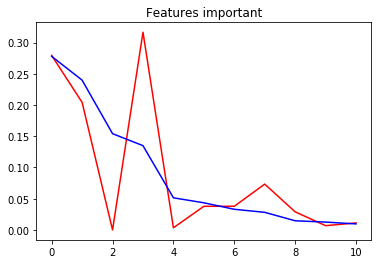

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


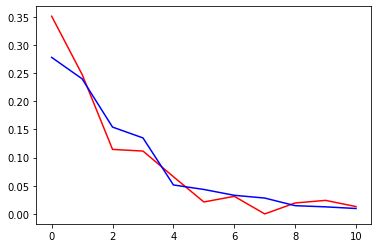

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


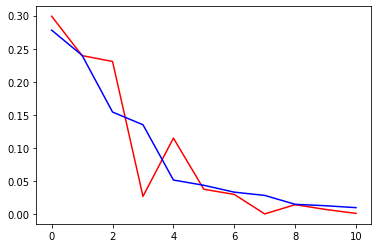

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


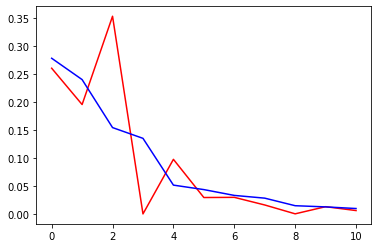

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


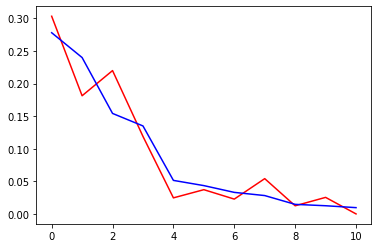

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


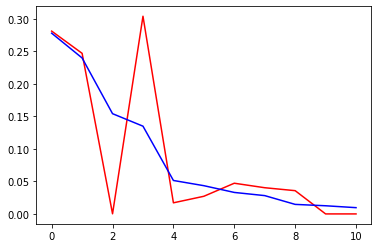

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


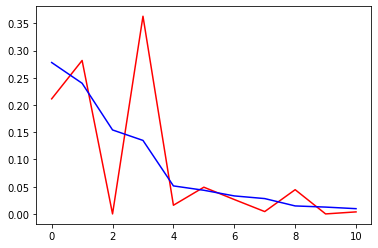

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


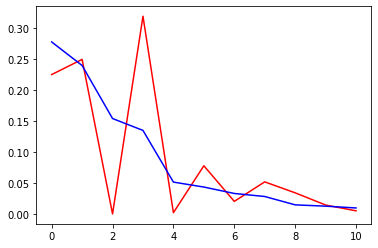

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


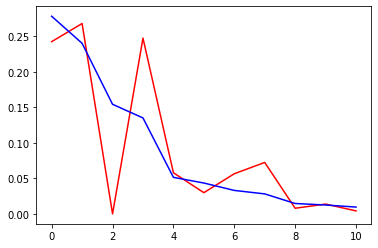

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


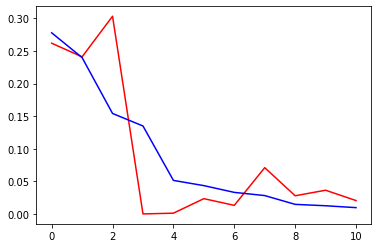

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


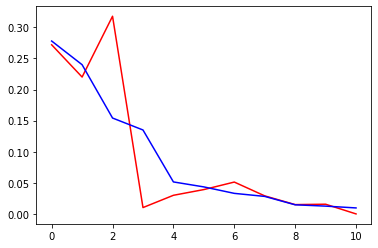

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


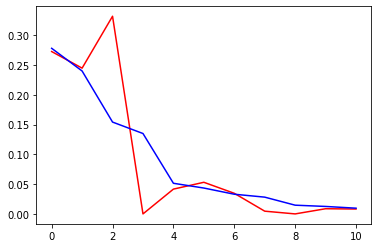

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


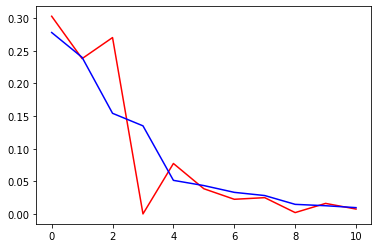

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


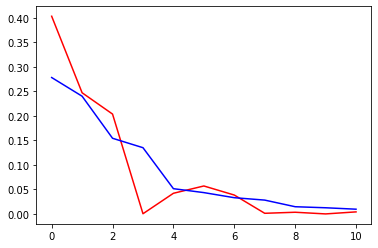

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


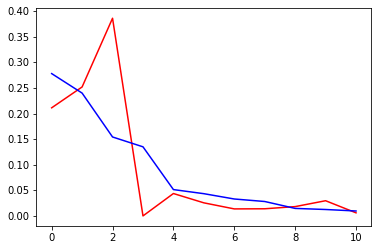

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


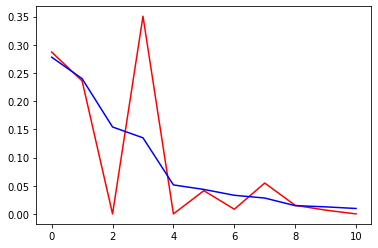

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


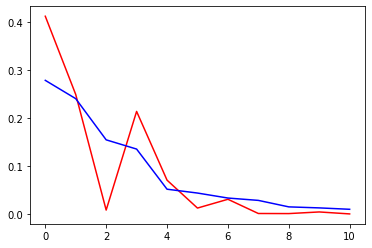

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


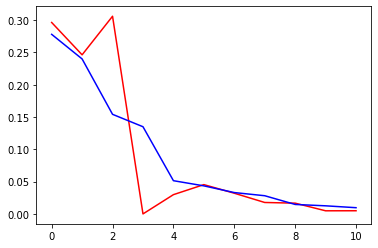

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


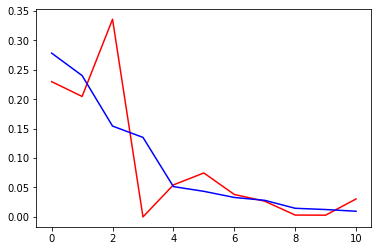

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


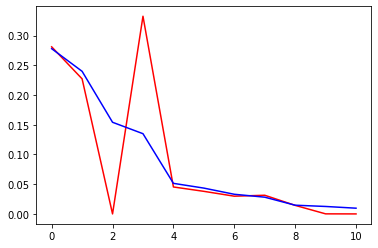

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


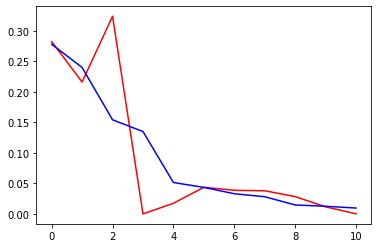

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


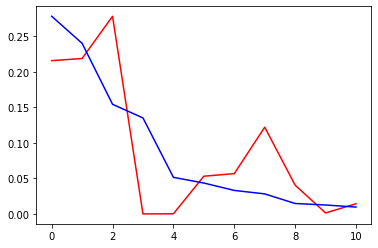

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


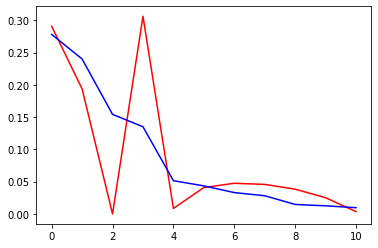

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


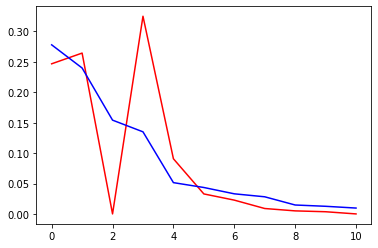

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


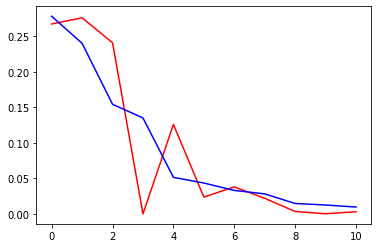

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


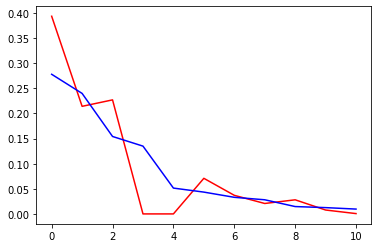

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


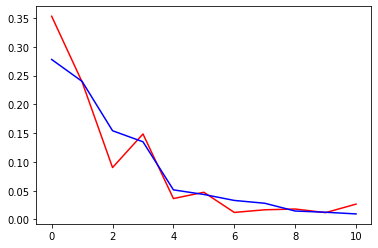

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


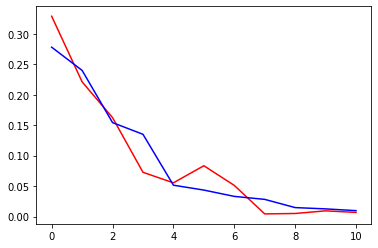

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


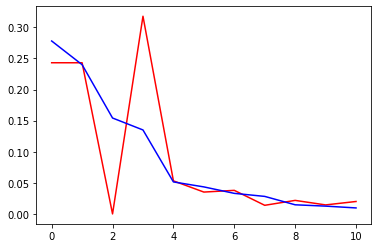

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


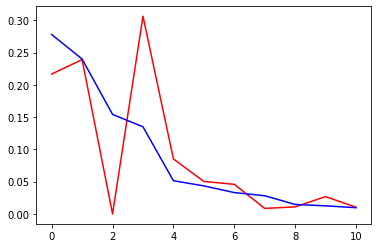

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


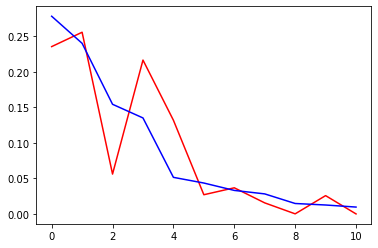

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


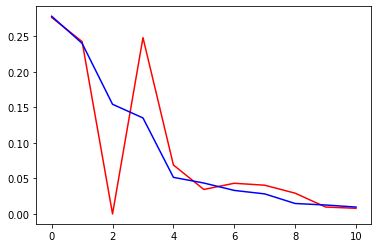

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


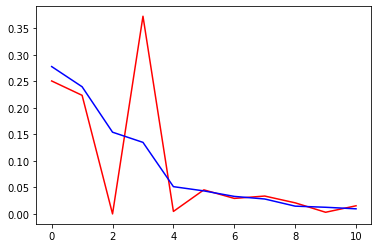

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


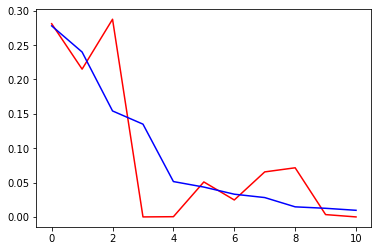

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


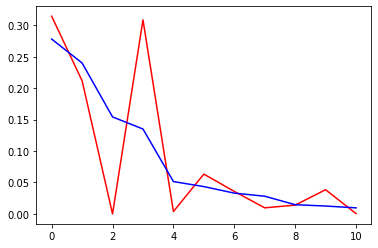

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


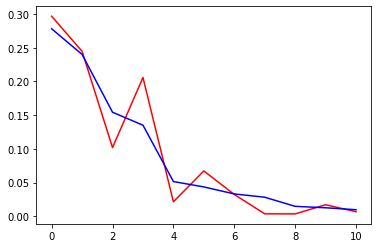

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


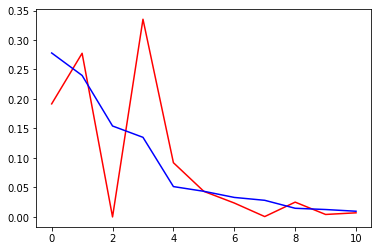

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


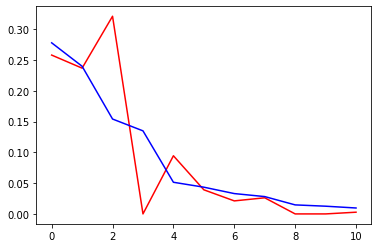

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


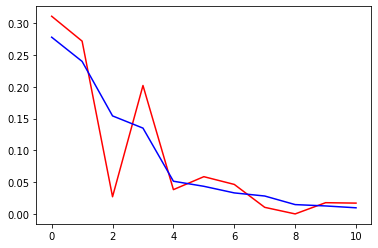

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


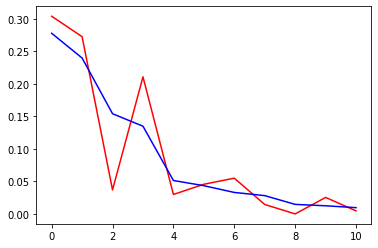

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


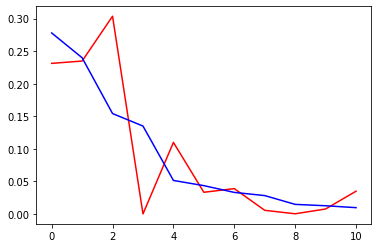

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


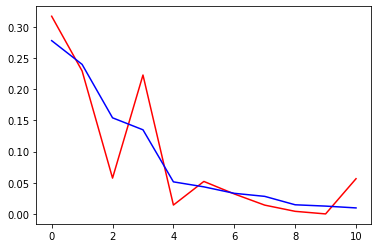

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


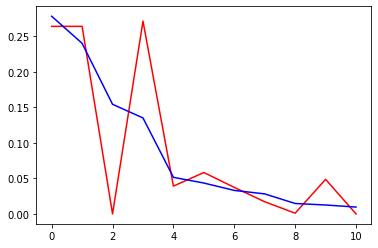

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


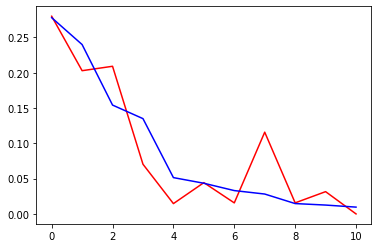

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


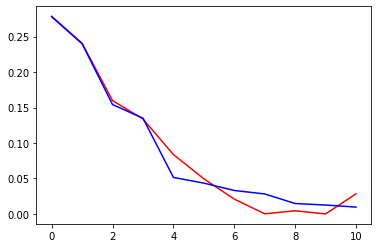

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


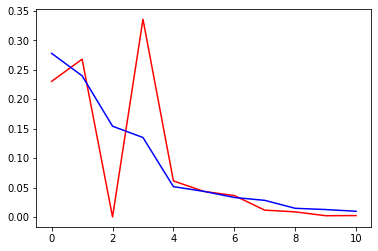

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


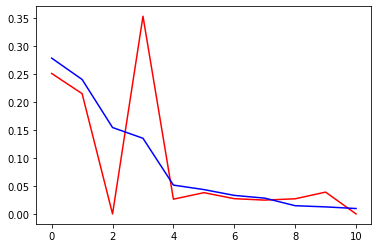

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


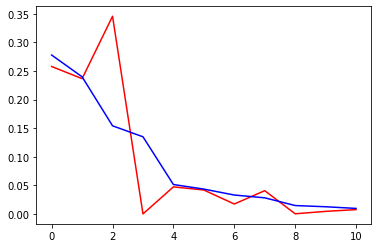

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


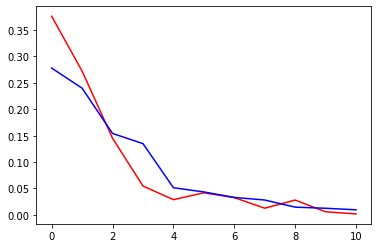

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


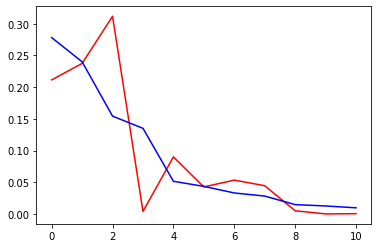

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


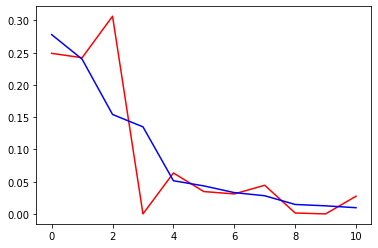

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


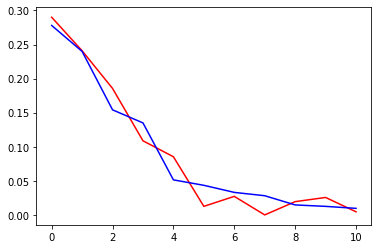

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


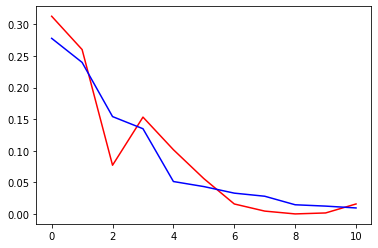

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


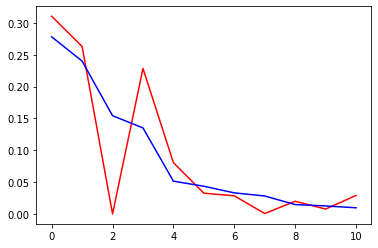

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


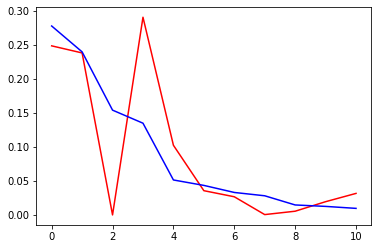

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


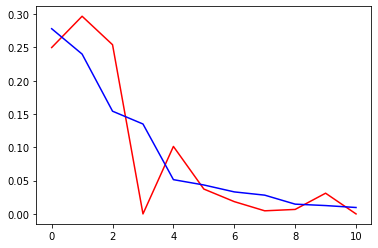

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


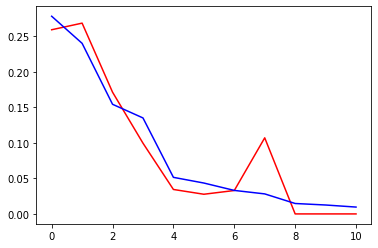

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


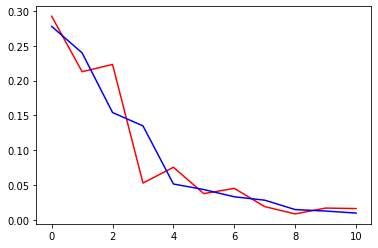

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


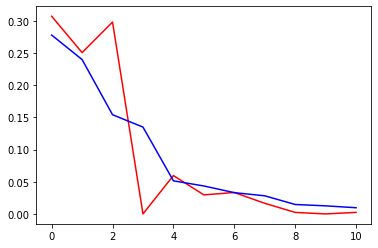

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


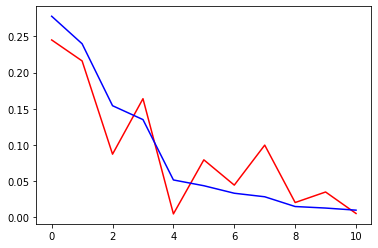

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


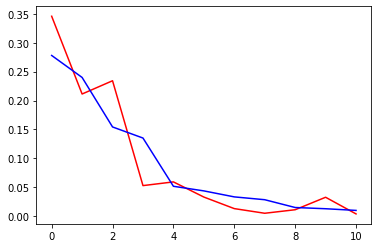

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


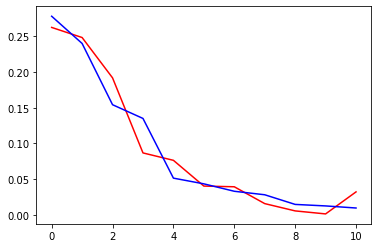

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


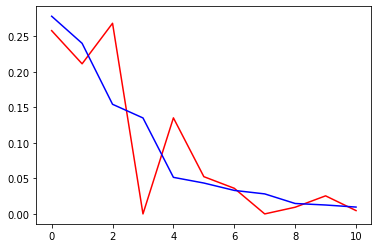

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


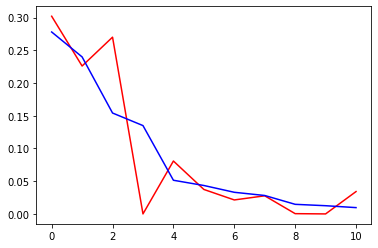

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


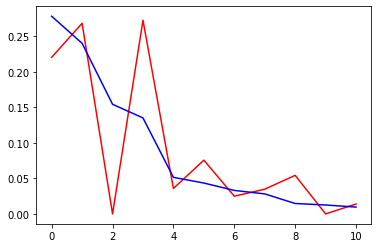

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


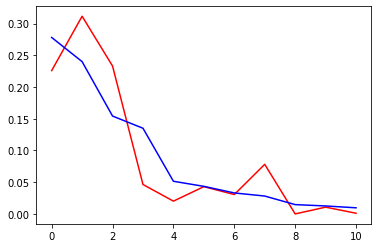

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


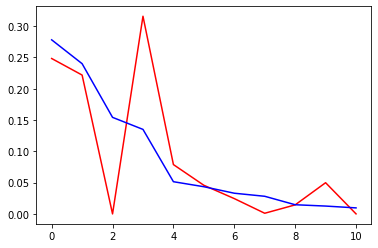

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


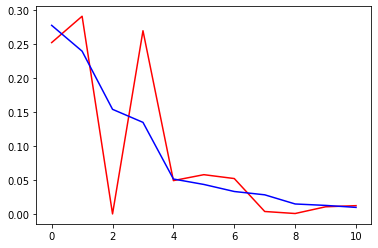

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


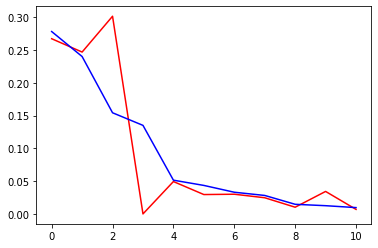

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


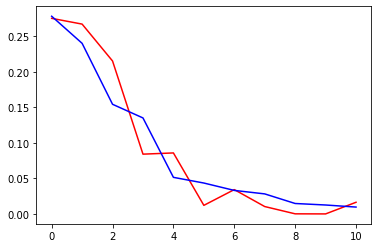

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


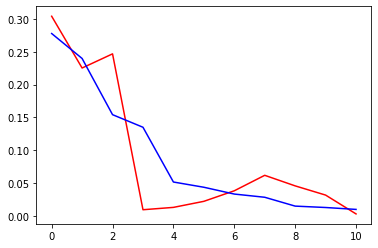

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


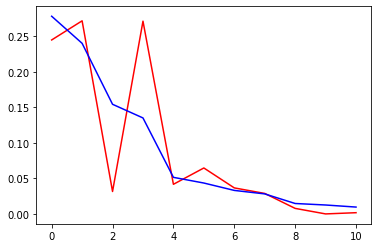

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


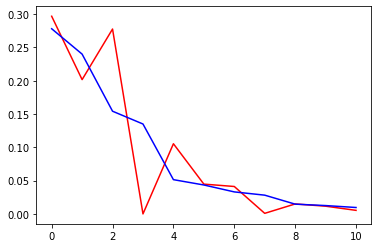

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


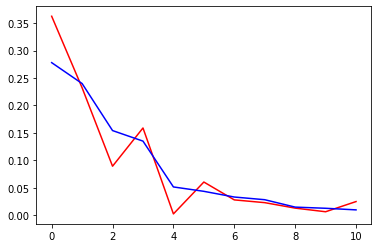

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


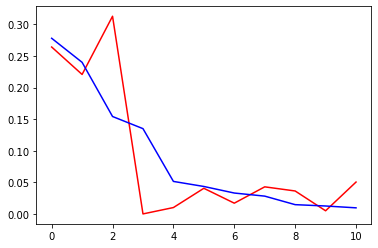

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


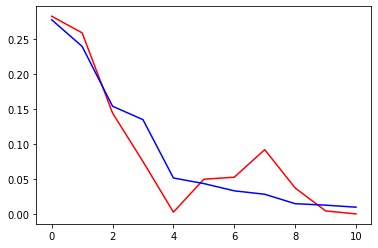

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


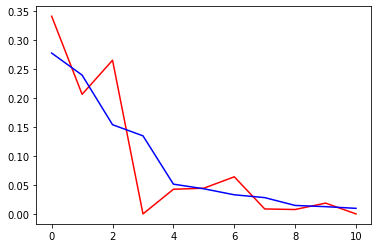

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


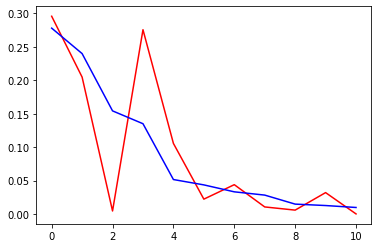

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


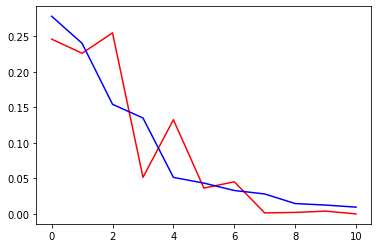

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


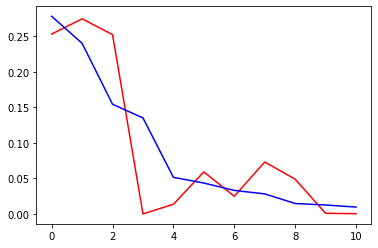

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


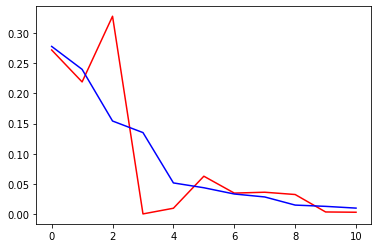

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


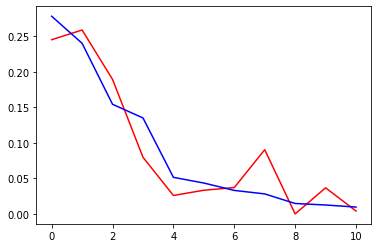

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


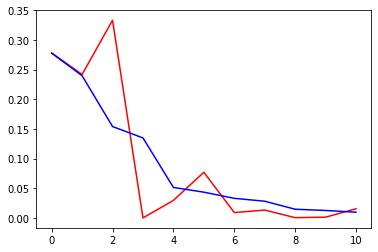

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


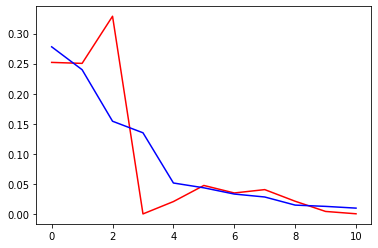

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


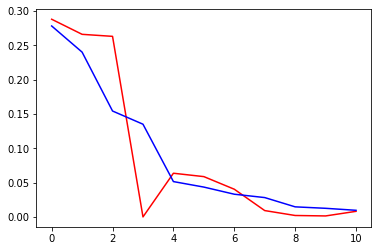

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


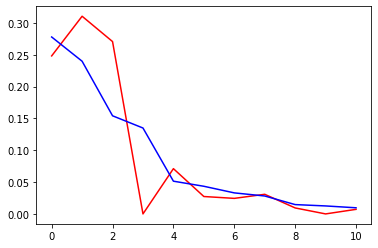

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


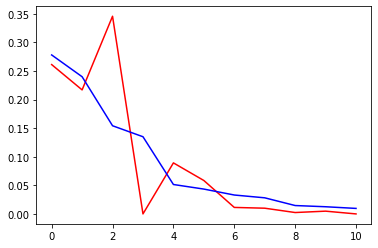

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


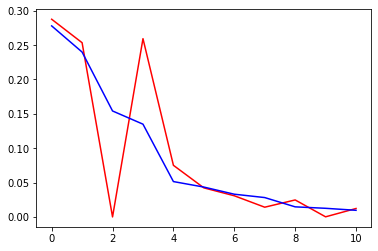

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


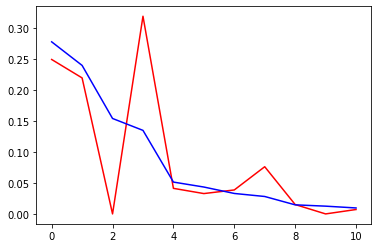

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


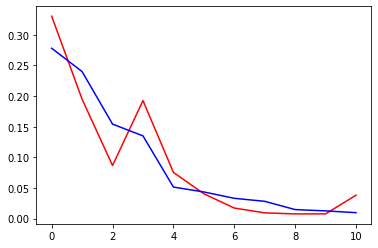

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


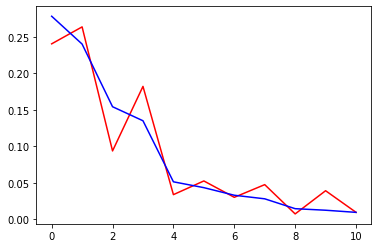

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


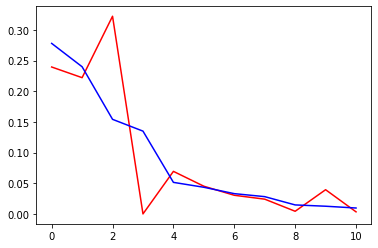

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


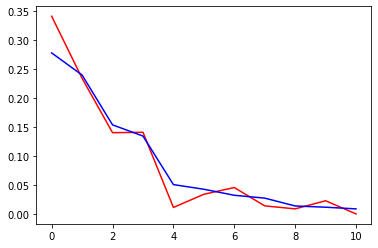

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


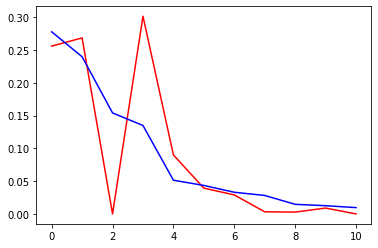

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


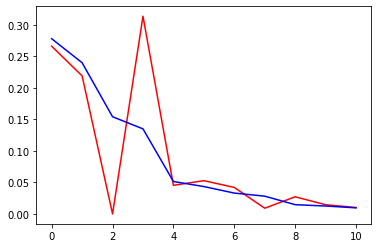

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


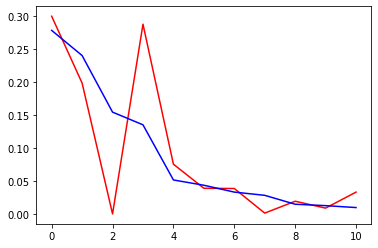

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


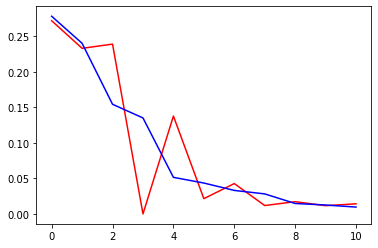

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


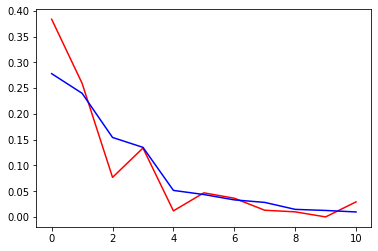

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


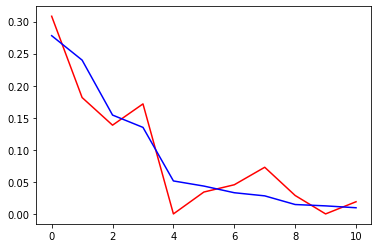

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


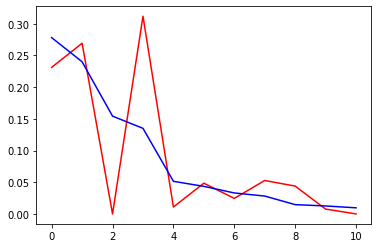

1. feature : Fare (0.278008)
2. feature : Age (0.239920)
3. feature : Split_Sex_female (0.154191)
4. feature : Split_Sex_male (0.134975)
5. feature : Split_Pclass_3 (0.051436)
6. feature : SibSp (0.043437)
7. feature : Parch (0.033051)
8. feature : Split_Pclass_1 (0.028160)
9. feature : Split_Pclass_2 (0.014658)
10. feature : split_is_child_True (0.012538)
11. feature : split_is_child_False (0.009627)


In [80]:
clf_importante(x2,rf)

In [84]:
len(x2.columns)


# revoir le random forest pour bien comprendre chapitre 15 

11

# utilisation des autre variables 